<a href="https://colab.research.google.com/github/sarthakd99/Stock-Prediction---TSA/blob/main/DNA_Sequence_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analysis of DNA Sequence Data using Biopython

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  

In [6]:
human=pd.read_table('/content/drive/MyDrive/dataset/human.txt')
human.head()

,sequence,class
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3


In [7]:
human.shape

(4380, 2)

In [8]:
human["sequence"][0]

'ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCATACTCCTTACACTATTCCTCATCACCCAACTAAAAATATTAAACACAAACTACCACCTACCTCCCTCACCAAAGCCCATAAAAATAAAAAATTATAACAAACCCTGAGAACCAAAATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG'

Function to collate over-lapping k-mers of length 4

In [9]:
def getKmers(sequence, size=4):
    return [sequence[x:x+size].lower() for x in range(len(sequence) - size + 1)]

In [11]:
human["words"]=human.apply(lambda x: getKmers(x["sequence"]),axis=1)
human=human.drop("sequence",axis=1)
human.head()

,class,words
0,4,"[atgc, tgcc, gccc, cccc, ccca, ccaa, caac, aac..."
1,4,"[atga, tgaa, gaac, aacg, acga, cgaa, gaaa, aaa..."
2,3,"[atgt, tgtg, gtgt, tgtg, gtgg, tggc, ggca, gca..."
3,3,"[atgt, tgtg, gtgt, tgtg, gtgg, tggc, ggca, gca..."
4,3,"[atgc, tgca, gcaa, caac, aaca, acag, cagc, agc..."


Building vocabular of string from k-mers

In [13]:
human_texts=list(human["words"])
for item in range(len(human_texts)):
    human_texts[item] = ' '.join(human_texts[item])
y_human = human.iloc[:, 0].values  

human_texts[2]

'atgt tgtg gtgt tgtg gtgg tggc ggca gcat catt attt tttg ttgg tggg gggc ggcg gcgc cgct gctg ctgt tgtt gttt tttg ttgg tggc ggca gcag cagt agtg gtga tgat gatg atga tgat gatt attg ttgc tgcc gcct cctt cttt tttc ttct tctg ctgt tgtt gttc ttca tcag cagt agtg gtgt tgtc gtct tctg ctga tgag gagt agtg gtgc tgct gcta ctat tatg atga tgaa gaag aaga agat gatt attg ttgc tgca gcac caca acac caca acag caga agag gagg aggt ggtc gtcc tcca ccag caga agat gatg atgc tgca gcat catt attc ttcc tccg ccgt cgtt gttt tttt tttg ttga tgag gaga agaa gaat aatg atgt tgtc gtca tcaa caat aatg atgg tgga ggat gata atac taca acac cacc acca ccaa caac aact actg ctgc tgct gctg ctgc tgct gctt cttt tttg ttgg tgga ggat gatt attt tttc ttca tcac cacc accg ccgg cggt ggtt gttg ttgg tggc ggcg gcgg cggt ggta gtag tagt agtt gttg ttga tgac gacc accc cccg ccgc cgct gctg ctgt tgtt gttt tttg ttgg tgga ggaa gaat aatg atgc tgca gcag cagc agcc gcca ccaa caat aatt attc ttcg tcga cgag gagt agtg gtga tgaa gaag aaga agaa gaaa aaat aata atat tatc atcc

In [14]:
y_human

array([4, 4, 3, ..., 6, 6, 6])

**Feature Extraction using Count Vectorizer**

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(4,4))
X = cv.fit_transform(human_texts)

In [16]:
print(X.shape)

(4380, 16834)


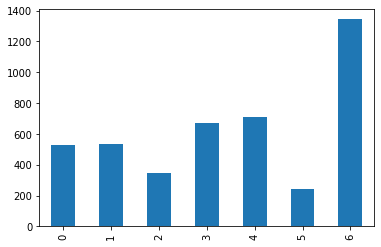

In [17]:
human["class"].value_counts().sort_index().plot.bar()